# Data validation & cleaning

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1 - load dataset

In [2]:
df = pd.read_csv("./MetObjects.csv")

C:\Users\mackm\AppData\Local\Temp\ipykernel_17944\1151200316.py:1: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\mackm\OneDrive\Рабочий стол\ČVUT\PDD\MetObjects.csv")


In [3]:
# check if the dataset loaded correctly

df.head(3)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [4]:
# set display options to view all the columns and not more than a 1000 rows

pd.set_option('display.max_columns', 54)
pd.set_option('display.max_rows', 1000)

## Step 2 - check consistency

In [5]:
# Check the main characteristics of the dataset

print(df.columns)
print(df.dtypes)

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL'],
      dtype='object')
Object Number               object
I

In [6]:
# check basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

In [7]:
# how many NaN values are there?

df.isna().sum()

Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number             435415
Department                      0
AccessionYear                3862
Object Name                  2266
Title                       28803
Culture                    276766
Period                     393813
Dynasty                    461755
Reign                      473720
Portfolio                  458442
Constituent ID             202443
Artist Role                202443
Artist Prefix              202443
Artist Display Name        202443
Artist Display Bio         204533
Artist Suffix              202491
Artist Alpha Sort          202443
Artist Nationality         202443
Artist Begin Date          202443
Artist End Date            202443
Artist Gender              378474
Artist ULAN URL            257515
Artist Wikidata URL        260754
Object Date                 13431
Object Begin D

Some features are not fully represented - e.g. have missing (NaN) values. It is reasonable to expect problems in these features.
3 features are chosen: ['Object Name', '']

In [8]:
# display the first 50 unique entries of the feature 'Object Name'

df['Object Name'].unique()[:50]

array(['Coin', 'Peso', 'Centavos', 'Pesos', 'Bust', 'Clock', 'Vase',
       'Side Chair', 'Figure', 'Advertisement', 'Ale glass', 'Andiron',
       'Apothecary jar', 'Statuette', 'Frame', 'Architectural elements',
       'Loggia elements', 'Bedroom', 'Argand lamp', 'Lamp shade',
       'Armchair', 'Banister-back armchair', 'Drawing',
       'Slat-back armchair', 'Spindle-back armchair', 'Teapot',
       'Rocking chair', 'Reclining armchair', 'Folding armchair',
       'Side chair', 'Revolving armchair', 'Furniture hardware',
       'Astral lamp', 'Window', 'Aviary', "Baby's bottle", 'Badge',
       'Baking dish', 'Balcony', 'Ball', 'Wall panel', 'Baluster',
       'Banjo clock', 'Bank', 'Baptismal basin', 'Baptismal bowl',
       'Baptismal certificate', 'Bottle', 'Mug', 'Keg'], dtype=object)

The types of objects apppear to be written by people, as types ['Coin', 'Peso', 'Pesos'], ['Slat-back armchair', 'Spindle-back armchair', 'Reclining armchair', 'Folding armchair', 'Side chair', 'Revolving armchair'] and many others appear to intend the same meaning.
As the given data in created by humans and written in a natural language - in this case - English, it seems obvious to use basic NLP techniques to clean the data - bring all those fearures in clusters by meaning.
The implementation and methods will be the following:
1) Removing all punctuation and signs, making all the words lowercase
2) Removing stop-words
3) Creating n-gramms (the size can be defined with basic cross-validation) - tokenizing
4) Lemmatization
5) Choosing the appropriate vectorizer - Count Vectorizer/TF-IDF/basic IDF
6) Classification of the vectors (words) - using K-Means or some other technique

In [9]:
# second 'suspicious' feature of choice is 'Title', let's check what is inside

df['Title'].unique()[:50]

array(['One-dollar Liberty Head Coin', 'Ten-dollar Liberty Head Coin',
       'Two-and-a-Half Dollar Coin',
       'Two-and-a-half-dollar Indian Head Coin',
       'Two-and-a-half-dollar Liberty Head Coin',
       'Twenty-dollar Liberty Head Coin', 'Five-dollar Indian Head Coin',
       'Five-dollar Liberty Head Coin', 'Coin, 1/2 Real',
       'Coin, 1/4 Peso', 'Coin, 1/4 Real', 'Coin, 10 Centavos',
       'Coin, 20 Pesos', 'Bust of Abraham Lincoln', 'Acorn Clock',
       'The Adams Vase', 'Side Chair', 'Figure of Admiral George Rodney',
       'Figure of Admiral Samuel Hood',
       'Advertisement for Norwich Stone Ware Factory', 'Ale Glass',
       'Andiron', 'Apothecary Jar', 'Figure of an Apple',
       'Statuette: Arab Waiter and Tray', 'Frame',
       'Architectural Elements',
       'Architectural elements from Halsted House, Rye, New York',
       'Architectural Elements from Laurelton Hall, Oyster Bay, New York',
       'Architectural elements from a Retiring Room in the North

As the given unique values are also seemingly groupable by their meaning - we can divide them into clusters. ['One-dollar Liberty Head Coin', 'Ten-dollar Liberty Head Coin',
'Two-and-a-Half Dollar Coin', 'Two-and-a-half-dollar Indian Head Coin', 'Two-and-a-half-dollar Liberty Head Coin'] - these obviously have a close meaning hence the same NLP techniques can be used to classify the inconsistent data and make fewer labels.

In [10]:
# trird 'suspicious' feature of choice is 'Title', let's check what is inside

df['Artist Nationality'].unique()[:50]

array(['American', nan, 'American| ', 'French', 'American|American', ' ',
       'German (Stuttgart, principality of Württemberg)',
       'American, born Scotland', ' |American',
       'American|American|American',
       'American|American|American|American|American', ' | ', 'Italian',
       'British', 'British| ', 'American|British', 'British|American',
       'American|American, born England', 'American, born Japan|American',
       ' | |American|American', 'American|American| ',
       'American, born Germany', 'British, Scottish', 'Italian|British',
       'American, born Scotland|American',
       'American|American, born Scotland', 'American| | ',
       'American| |American', ' | |American', ' |American|American',
       'German', 'British|British', 'Dutch| ', ' |Dutch',
       'French|American', 'American|American and French', ' |German',
       'German (Prussian)', 'American, born Germany|American',
       ' |British', 'French|French', 'American, born Lithuania',
       'A

Most of the given entries are duplicates of the same information - ['American|American|American','American|American|American|American|American']. The easy solution will be to remove all duplicates, in cases like ['American|American, born England'] we can check if after deleting all duplicates the entry [A, born E] is popular. If yes, we create a separate feature off of it. If not, we can just leave out [A] or [E] after evaluating what is more important. (I would drop the place of birth)

## Step 3 - check integrity

City and coutry features of a single object should be corresponding, e.g. if we find an object made in London and Sweden, the criterion of integrity is not satisfied as London is not Sweden


In [11]:
# how does the data look?
df['City'].unique()[:50]

array([nan, 'Philadelphia', 'Bristol', 'New York', 'Lebanon', 'Norwich',
       'East Cambridge', 'Somerville', 'Boston', 'Delft', 'Meriden',
       'Rye', 'Oyster Bay', 'New Lebanon', 'London', 'Portsmouth',
       'Boston|Philadelphia', 'Boston|Charlestown', 'Lititz', 'Chicago',
       'Wakefield', 'Portland', 'Salem', 'Newark', 'New York|Paris',
       'Bennington', 'Hartford', 'Paris', 'Petersburg', 'Alexandria',
       'Concord', 'Sandwich', 'Pittsburgh', 'Strasburg', 'Middletown',
       'Baltimore', 'Providence', 'Preston', 'Hartford|New York',
       'Charleston', 'Albany', 'Cincinnati', 'Worcester', 'Newburyport',
       'Barnstable|Bristol', 'Barnstable', 'Beverly', 'Hancock',
       'Brooklyn', 'Trenton'], dtype=object)

In [12]:
df['Country'].unique()[:15]


array([nan, 'Mexico', 'Guatemala', 'United States', 'England', 'Spain',
       'United States|England', 'Netherlands',
       'United States|United States', 'France', 'Canada',
       'United States|France', 'England|France', 'China', 'Italy'],
      dtype=object)

Both features have some entries, where 2 countries or cities are mentioned twice. We have no idea why, so we could drop the second entry as maybe the first one mantioned would be of a bigger importance.

In [13]:
df2 = df

In [14]:
def get_first(entry):
    if '|' in entry:
        return entry.split('|')[0]
    else:
        return entry

In [15]:
# make all enties string just in case
df['Country'] = df['Country'].astype(str)

In [16]:
# drop all the second entries and '|' or leave enrty if it has one country inside
df['Country'] = df['Country'].apply(get_first)

In [17]:
# results
df['Country'].head(200).tolist()[:100]

['nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'Mexico',
 'Mexico',
 'Mexico',
 'Mexico',
 'Mexico',
 'Mexico',
 'Mexico',
 'Guatemala',
 'Guatemala',
 'Mexico',
 'Mexico',
 'Mexico',
 'Mexico',
 'Mexico',
 'Mexico',
 'Mexico',
 'Mexico',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'United States',
 'England',
 'England',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'United States',
 'United States',
 'nan',
 'nan',
 'nan',
 'nan',
 'United States',
 'United States',
 'nan',
 'nan',
 'nan',
 'nan',
 'Spain',
 'Spain',
 'United States',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'United States',
 'United States',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'United States',
 'United States',
 'na

Now we need to do the same with cities

In [18]:
df['City'] = df['City'].astype(str)
df['City'] = df['City'].apply(get_first)
df['City'].head(200).tolist()[:20]

['nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

To check integrity we can simply view if two columns intersect (eg there is a city in Contry column or otherwise). If that is the case (it is) we can prove data integrity is corrupted.

Let's take a look in 'Artist Gender'. Try clean up the weirdness a bit and see if anything is wrong.

In [19]:
set(df['Country']).intersection(set(df['City']))

{'Brussels',
 'Constantinople',
 'Gotland',
 'Netherlands',
 'Niederbreisig',
 'Rome',
 'Sarawak',
 'Sumatra',
 'Tirana',
 'United States',
 'Zanzibar',
 'nan',
 'northern France'}

In [20]:
df['Artist Gender'].unique()

array([nan, '|', '|Female', '||', '||||', 'Female|', 'Female', '|||',
       'Female|Female', '||Female', '|Female|Female', 'Female||',
       'Female|Female|Female|Female|Female||Female|Female||||||Female|Female|Female|Female|||Female|||Female|Female|',
       '|Female|', '|||Female', 'Female||Female', 'Female|Female|Female|',
       '||||||||', '|||||||||||||||||||||||||||', 'Female|Female|',
       'Female|Female||', 'Female|||', '|Female||', '||Female|Female',
       '|Female||Female', '||Female|', 'Female|Female|Female', '||||||',
       '|Female|||Female', '|||||', '|||||||', '||||Female|',
       '||||||||||', '||||||||||||||||', '|||||||||||||', '|||||||||',
       '||||||||||||||||||||',
       'Female|||||||||||||||||||||||||||||Female||Female||||',
       'Female||||Female|||Female|||||||||||||||||Female|',
       '|Female||||||||||||||Female', '||||||Female||||||',
       'Female||||Female|||||Female|||',
       '|||||Female||||||Female|||||Female||||Female', '||||Female',


In [21]:
df['Artist Gender'] = df['Artist Gender'].str.replace('|', '')
df['Artist Gender'].unique()

array([nan, '', 'Female', 'FemaleFemale',
       'FemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemale',
       'FemaleFemaleFemale', 'FemaleFemaleFemaleFemale',
       'FemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemale',
       'FemaleFemaleFemaleFemaleFemaleFemaleFemaleFemale',
       'FemaleFemaleFemaleFemaleFemaleFemale',
       'FemaleFemaleFemaleFemaleFemale',
       'FemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemale',
       'FemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemale',
       'FemaleFemaleFemaleFemaleFemaleFemaleFemale'], dtype=object)

In [22]:
df.dropna(subset=['Artist Gender'], inplace=True)
df['Artist Gender'] = df['Artist Gender'].apply(lambda x: x.replace('Female', '', x.count('Female') - 1))
df['Artist Gender'].unique()

array(['', 'Female'], dtype=object)

There are no males. That is a huge problem with integrity. Are there any male names in 'Artist Name'? If yes the integrity is definitely corrupted.

In [23]:
df['Artist Display Name'].unique()[:10]

array(['Paulding Farnham|Tiffany & Co.',
       'Louis C. Tiffany|Tiffany Glass and Decorating Company',
       'John Henry Belter|J. H. Belter & Co.',
       'J. H. Belter & Co.|John Henry Belter',
       'Tiffany Studios|Agnes F. Northrop',
       'Winslow Brothers Company|Louis Henry Sullivan',
       'Louis Henry Sullivan|Dankmar Adler',
       'Louis Henry Sullivan|Yale and Towne Manufacturing Company|Dankmar Adler',
       'Samuel Hamlin|Samuel Ely Hamlin',
       'Joseph Leddel Sr.|Joseph Leddel Jr.'], dtype=object)

Louis, Samuelm John, Windslow Brothers - obviously males. No 'male' option in Gender though. Integrity is corrupted.

## Step 4 - convert to proper data type

First will be numerical. Let's take a look at 'Object Number'

In [24]:
df['Constituent ID'].unique()

array(['108316253', '16254216254', '110321528', ..., '1640377460816198',
       '1640371619827460', '7460816403716198'], dtype=object)

Resulting datatype is object. We need it to be numerical as IDs are plain numbers.

In [25]:
df['Constituent ID'] = pd.to_numeric(df['Constituent ID'], errors='coerce')
# as result we are getting float, ID is a whole number, change to int. nan are float, we cannot convert them to int, need to drop

In [26]:
df['Constituent ID'].dropna().astype('int64')
df['Constituent ID'].dtypes

dtype('float64')

We are still getting float64 as the numbers are out of range of int64. This is not a problem as they are numeric anyway.

Now let's try 'Gallery Number'

In [27]:
df['Gallery Number'].unique()[:10]

array(['706', '774', '743', '739', '700', '701', nan, '704', '750', '729'],
      dtype=object)

In [28]:
df['Gallery Number'] = pd.to_numeric(df['Gallery Number'], errors='coerce')
df['Gallery Number'].dtypes

dtype('float64')

Let's do categories. 'Tags', 'Cities'

In [29]:
df['Tags'].unique()

array(['Animals|Garlands|Birds|Men', nan,
       'Windows|Waterfalls|Landscapes|Autumn', ..., 'Musicians|Cellos',
       'Billiards', 'Horses|Sports'], dtype=object)

In [30]:
df['Tags'] = df['Tags'].astype('category')
df['Tags']

34        Animals|Garlands|Birds|Men
111                              NaN
112                              NaN
203                              NaN
204                              NaN
                     ...            
484945                           NaN
484946                           NaN
484947                           NaN
484948                           NaN
484949                           NaN
Name: Tags, Length: 106482, dtype: category
Categories (14790, object): ['Abbeys', 'Abbeys|Ruins|Men', 'Abbeys|Women|Washing', 'Abel|Adam|Eve|Death', ..., 'Zeus', 'Zodiac', 'Zodiac|Astronomy', 'Zodiac|Male Nudes|Pegasus']

In [31]:
df['City'].dtypes

dtype('O')

In [32]:
df['City'] = df['City'].astype('category')
df['City']

34        New York
111       New York
112       New York
203       New York
204       New York
            ...   
484945         nan
484946         nan
484947         nan
484948         nan
484949         nan
Name: City, Length: 106482, dtype: category
Categories (570, object): ['Aarau', 'Ahmedabad', 'Aix', 'Akron', ..., 'probably Istanbul or Amasya', 'probably Lahore', 'probably Paris', 'probably Shiraz']

Now it is time for datetime.

In [33]:
df['Object Begin Date'].unique()

array([ 1893,  1894,  1888,  1890,  1850,  1923,  1899,  1891,  1770,
        1712,  1830,  1810,  1822,  1667,  1916,  1776,  1876,  1847,
        1716,  1907,  1784,  1910,  1846,  1849,  1835,  1844,  1908,
        1887,  1905,  1898,  1882,  1902,  1857,  1919,  1897,  1912,
        1929,  1777,  1922,  1870,  1800,  1790,  1725,  1892,  1820,
        1877,  1873,  1764,  1845,  1895,  1827,  1795,  1901,  1815,
        1832,  1896,  1861,  1670,  1663,  1761,  1852,  1878,  1788,
        1739,  1825,  1886,  1793,  1866,  1848,  1813,  1860,  1874,
        1927,  1867,  1904,  1805,  1903,  1883,  1759,  1760,  1952,
        1775,  1918,  1889,  1769,  1824,  1767,  1840,  1791,  1731,
        1831,  1796,  1911,  1913,  1862,  1875,  1837,  1765,  1915,
        1900,  1854,  1853,  1823,  1834,  1778,  1750,  1718,  1730,
        1782,  1807,  1914,  1884,  1880,  1828,  1842,  1829,  1855,
        1797,  1698,  1773,  1735,  1697,  1762,  1652,  1665,  1662,
        1843,  1841,

Some are 0, some are negative. Obviously '-1410' means 1410. 0 we can't be sure, let's leave it as 0. Could be made then.

In [34]:
df['Object Begin Date'] = df['Object Begin Date'].abs()
df['Object Begin Date'].unique()

array([1893, 1894, 1888, 1890, 1850, 1923, 1899, 1891, 1770, 1712, 1830,
       1810, 1822, 1667, 1916, 1776, 1876, 1847, 1716, 1907, 1784, 1910,
       1846, 1849, 1835, 1844, 1908, 1887, 1905, 1898, 1882, 1902, 1857,
       1919, 1897, 1912, 1929, 1777, 1922, 1870, 1800, 1790, 1725, 1892,
       1820, 1877, 1873, 1764, 1845, 1895, 1827, 1795, 1901, 1815, 1832,
       1896, 1861, 1670, 1663, 1761, 1852, 1878, 1788, 1739, 1825, 1886,
       1793, 1866, 1848, 1813, 1860, 1874, 1927, 1867, 1904, 1805, 1903,
       1883, 1759, 1760, 1952, 1775, 1918, 1889, 1769, 1824, 1767, 1840,
       1791, 1731, 1831, 1796, 1911, 1913, 1862, 1875, 1837, 1765, 1915,
       1900, 1854, 1853, 1823, 1834, 1778, 1750, 1718, 1730, 1782, 1807,
       1914, 1884, 1880, 1828, 1842, 1829, 1855, 1797, 1698, 1773, 1735,
       1697, 1762, 1652, 1665, 1662, 1843, 1841, 1812, 1742, 1705, 1780,
       1789, 1772, 1747, 1838, 1879, 1924, 1906, 1909, 1885, 1833, 1921,
       1935, 1821, 1808, 1932, 1809, 1869, 1930, 18

In [35]:
df['Object Begin Date'] = pd.to_datetime(df['Object Begin Date'],  format='%Y', errors='coerce')

In [36]:
df['Object Begin Date'].unique()

<DatetimeArray>
['1893-01-01 00:00:00', '1894-01-01 00:00:00', '1888-01-01 00:00:00',
 '1890-01-01 00:00:00', '1850-01-01 00:00:00', '1923-01-01 00:00:00',
 '1899-01-01 00:00:00', '1891-01-01 00:00:00', '1770-01-01 00:00:00',
 '1712-01-01 00:00:00',
 ...
 '2140-01-01 00:00:00', '2014-01-01 00:00:00', '2015-01-01 00:00:00',
 '2016-01-01 00:00:00', '2017-01-01 00:00:00', '2018-01-01 00:00:00',
 '2019-01-01 00:00:00', '2020-01-01 00:00:00', '2021-01-01 00:00:00',
 '2022-01-01 00:00:00']
Length: 348, dtype: datetime64[ns]

## Step 5 - outliers.

Let's do a simple plot test on 'Object Begin Date'. We will see the outliers clearly

<Axes: >

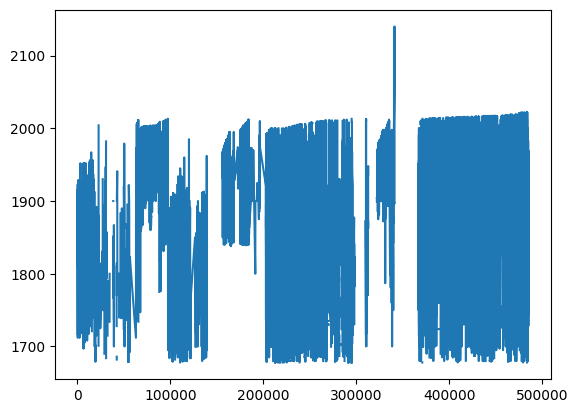

In [37]:
from datetime import datetime
df['Object Begin Date'].plot()

In [38]:
df[df['Object Begin Date'] > datetime(2023, 1, 1)]['Object Begin Date']

340928   2060-01-01
340929   2060-01-01
340930   2140-01-01
Name: Object Begin Date, dtype: datetime64[ns]

In [39]:
# let's also try object end date
df['Object End Date'] = df['Object End Date'].abs()
df['Object End Date'] = pd.to_datetime(df['Object End Date'],  format='%Y', errors='coerce')
df[df['Object End Date'] > datetime(2023, 1, 1)]['Object End Date']

195087   2025-01-01
195123   2025-01-01
195124   2025-01-01
195127   2025-01-01
310255   2035-01-01
367174   2038-01-01
379067   2038-01-01
387024   2038-01-01
387025   2039-01-01
387752   2027-01-01
388023   2027-01-01
407198   2089-01-01
407213   2078-01-01
412622   2040-01-01
460916   2035-01-01
460917   2035-01-01
460918   2035-01-01
474024   2044-01-01
Name: Object End Date, dtype: datetime64[ns]

Lastly we will look at outliers in 'Dimensions' after cleaning them. See the end of the notebook.

These are easy outliers as these days are in the future.

## Step 6 - missing data

In [40]:
df.isna().sum()

Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number             103772
Department                      0
AccessionYear                1343
Object Name                   598
Title                         403
Culture                     89903
Period                     105742
Dynasty                    106321
Reign                      106357
Portfolio                   87120
Constituent ID                 16
Artist Role                     0
Artist Prefix                   0
Artist Display Name             0
Artist Display Bio              0
Artist Suffix                   0
Artist Alpha Sort               0
Artist Nationality              0
Artist Begin Date               0
Artist End Date                 0
Artist Gender                   0
Artist ULAN URL              1322
Artist Wikidata URL          1324
Object Date                  1401
Object Begin D

Some of the obvious criteria which have many missing values are 'Culture', 'Object Date'

In [41]:
# we can fill missing culture values with nationality
df['Culture'].isna().sum()

89903

In [42]:
df['Culture'] = df['Culture'].fillna(df['Artist Nationality'])

In [43]:
df['Culture'].isna().sum()

0

In [44]:
df['Object Date']

34                    1893–95
111                      1894
112                      1894
203               ca. 1891–93
204                  ca. 1893
                 ...         
484945    published 1643/1646
484946    published 1643/1646
484947    published 1643/1646
484948    published 1643/1646
484949    published 1643/1646
Name: Object Date, Length: 106482, dtype: object

Has beginning date - end date. Can use those columns as 'Begin'-'End' to fill missing information.

In [45]:
df['Object Begin Date']

34       1893-01-01
111      1894-01-01
112      1894-01-01
203      1888-01-01
204      1890-01-01
            ...    
484945          NaT
484946          NaT
484947          NaT
484948          NaT
484949          NaT
Name: Object Begin Date, Length: 106482, dtype: datetime64[ns]

In [46]:
df['Object Date'] = df.apply(lambda row: f"{row['Object Begin Date']} - {row['Object End Date']}" if pd.isna(row['Object Date']) else row['Object Date'], axis=1)

In [47]:
print(df['Object Date'].isna().sum())
df['Object Date'].unique()[:100]

0


array(['1893–95', '1894', 'ca. 1891–93', 'ca. 1893', '1850–60', '1923–24',
       '1899–1904', '1893', 'ca. 1894–95', '1770–1870', '1712–54',
       'ca. 1833–46', '1810–50', '1822–24', 'ca. 1670', '1810–15', '1916',
       '1776–1883', '1876', '1847', '1716 or 1719 (edition)',
       'ca. 1910–20', '1784', 'after 1909', 'ca. 1849–58', '1849–58',
       '1835–65', 'ca. 1846', '1908–12', 'ca. 1890–95', '1890', '1893–96',
       'ca. 1908', '1898–1902', '1882', '1810–65', 'ca. 1905–10',
       '1905–15', 'ca. 1860', 'ca. 1850', 'ca. 1922', 'ca. 1900', '1912',
       'ca. 1910', '1929', '1777 (?)', '1922', '1870–75', 'ca. 1902–10',
       'ca. 1902', '1800–1810', '1790–1804', '1730–45', 'ca. 1895',
       '1810–20', '1820–30', '1810–25', '1877', 'ca. 1876', 'ca. 1769',
       'ca. 1848', '1895', 'ca. 1830', '1795–1803', 'ca. 1849',
       'ca. 1904', '1770–90', '1815–20', 'ca. 1837', '1907–9', '1901–2',
       'ca. 1900–1910', 'ca. 1899', 'ca. 1770–72', 'ca. 1850–56',
       'ca. 1864', '

One more feature with many missing values 'Gender'. It has no null values, but only has females as we saw. So male values are basically missing. So we could use some library like Gender Guesser to check 'Artist Name' column and fill the missing male values by guessing the gender by name.

## Step 7 - cleaning 'Medium'

In [48]:
df['Medium']

34        Gold, amethysts, spessartites, tourmalines, fr...
111                                     Bronze, glass, iron
112                                     Bronze, glass, iron
203       Prima vera, American ash (secondary wood); mar...
204       Prima vera, American ash (secondary wood); mar...
                                ...                        
484945                                            Engraving
484946                                            Engraving
484947                                            Engraving
484948                                            Engraving
484949                                            Engraving
Name: Medium, Length: 106482, dtype: object

Obviously NLP techniques are to be used. We will use the framework described earlier.

In [49]:
import nltk
import string

In [50]:
df['Medium']=df['Medium'].astype('string')

In [51]:
df['Medium'].isna().sum()

2301

In [52]:
df['Medium'].fillna('', inplace=True)

In [53]:
# %pip install tqdm
from tqdm import tqdm
tqdm.pandas()
for ch in string.punctuation:
    df['Medium'] = df['Medium'].str.replace(ch, "")  # remove punctuation

df['Medium'] = df['Medium'].str.lower()  # make lowercase

from nltk.corpus import stopwords
noise = stopwords.words('english')
# removing stop_words
df['Medium'] = df['Medium'].progress_apply(lambda x: ' '.join([word for word in x.split() if word not in noise]))

100%|██████████| 106482/106482 [00:00<00:00, 227961.64it/s]


In [54]:
df['Medium'].unique()

array(['gold amethysts spessartites tourmalines fresh water pearls quartzes rock crystal enamel',
       'bronze glass iron',
       'prima vera american ash secondary wood marquetry various woods brass replacement upholstery',
       ..., 'etching thin white japan paper',
       'drypoint watercolor additions', 'etching watercolor additions'],
      dtype=object)

In [55]:
tqdm.pandas()
porter = nltk.PorterStemmer()  # lemmatization/stemming
X_train = df['Medium'].progress_apply(lambda x: [porter.stem(y) for y in x])  # stemming each word in str

100%|██████████| 106482/106482 [00:00<00:00, 131793.04it/s]


In [56]:
from sklearn.feature_extraction.text import CountVectorizer  # exact type of vectorizer must be cross validated
count_vectorizer = CountVectorizer(ngram_range=(1, 2)) # number of ngrams must be cross validated, will use 2 as an example
count_vectorized_medium = count_vectorizer.fit_transform(df['Medium'])

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vectorized_x_train = tfidf_vectorizer.fit_transform(df['Medium'])

After cross-validation we can choose the appropriate type/size of n-grams and a vectoriser. Resulting vectors then can be used by the KNN algorithm

## Step 8 Extracting physical dimensions from 'Dimensions'

In [57]:
df['Dimensions'].unique()[:50]

array(['Overall: 19 7/16 x 13 x 9 1/4 in. (49.4 x 33 x 23.5 cm); 352 oz. 18 dwt. (10977 g)\r\nBody: H. 18 7/8 in. (47.9 cm)\r\nCover: 4 1/4 x 4 13/16 in. (10.8 x 12.2 cm); 19 oz. 6 dwt. (600.1 g)',
       '25 x 15 x 35 in. (63.5 x 38.1 x 88.9 cm)',
       '35 5/8 x 25 1/4 x 26 1/8 in. (90.5 x 64.1 x 66.4 cm)',
       '35 3/8 x 25 5/8 x 26 1/4 in. (89.9 x 65.1 x 66.7 cm)',
       '50 x 26 1/2 x 23 in. (127 x 67.3 x 58.4 cm)',
       '49 1/2 x 26 1/2 x 22 1/2 in. (125.7 x 67.3 x 57.2 cm)',
       '132 x 102 in. (335.3 x 259.1 cm)',
       '39 x 9 7/8 x 1 in. (99.1 x 25.1 x 2.5 cm)',
       '10 7/8 x 31 3/4 in. (27.6 x 80.6 cm)',
       '31 3/4 x 10 7/8 x 1 1/8 in. (80.6 x 27.6 x 2.9 cm)',
       '34 1/2 x 10 in. (87.6 x 25.4 cm)',
       '2 x 5 3/4 x 5 3/4 in. (5.1 x 14.6 x 14.6 cm)',
       '2 3/4 x 12 7/8 x 12 7/8 in. (7 x 32.7 x 32.7 cm)',
       'Overall: H. 3 7/16 in. (8.7 cm); 4 oz. 8 dwt. (137.4 g)\r\nLip: Diam. 3 1/16 in. (7.8 cm)\r\nBase: Diam. 2 1/2 in. (6.4 cm)',
       'H. 5 

We need to get w x d x h in cm from it. The cm values as seen are within the ()

In [58]:
import re

all numbers between any any )( and 'cm'. if x ok, if /s also ok

In [59]:
regex = r'\(([\d.]+)(?: x ([\d.]+)(?: x ([\d.]+))?)? cm\)'

In [60]:
def get_cm(dim):
    if pd.isna(dim):
        return np.nan
    matches = re.findall(regex, dim)
    cm_val = []
    for match in matches:
        numbers = [float(num) for num in match if num]
        cm_val.extend(numbers)
    return cm_val

In [61]:
df['Dimensions'].astype(str)

34        Overall: 19 7/16 x 13 x 9 1/4 in. (49.4 x 33 x...
111                25 x 15 x 35 in. (63.5 x 38.1 x 88.9 cm)
112                25 x 15 x 35 in. (63.5 x 38.1 x 88.9 cm)
203       35 5/8 x 25 1/4 x 26 1/8 in. (90.5 x 64.1 x 66...
204       35 3/8 x 25 5/8 x 26 1/4 in. (89.9 x 65.1 x 66...
                                ...                        
484945                  8 1/16 × 9 7/8 in. (20.4 × 25.1 cm)
484946                  8 1/16 × 9 7/8 in. (20.4 × 25.1 cm)
484947                  8 1/16 × 9 7/8 in. (20.4 × 25.1 cm)
484948                  8 1/16 × 9 7/8 in. (20.4 × 25.1 cm)
484949                  8 1/16 × 9 7/8 in. (20.4 × 25.1 cm)
Name: Dimensions, Length: 106482, dtype: object

In [62]:
df['Dimensions in cm'] = df['Dimensions'].apply(get_cm)

In [63]:
df['Dimensions in cm'][:10]

34     [49.4, 33.0, 23.5, 47.9, 10.8, 12.2]
111                      [63.5, 38.1, 88.9]
112                      [63.5, 38.1, 88.9]
203                      [90.5, 64.1, 66.4]
204                      [89.9, 65.1, 66.7]
220                     [127.0, 67.3, 58.4]
221                     [125.7, 67.3, 57.2]
241                          [335.3, 259.1]
265                       [99.1, 25.1, 2.5]
266                            [27.6, 80.6]
Name: Dimensions in cm, dtype: object

Let's put two columns near each other for readability.

In [64]:
df.columns.get_loc('Dimensions')

32

In [65]:
col_cm = df.pop('Dimensions in cm')
df.insert(33, 'Dimensions in cm', col_cm)
df.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Dimensions in cm',
       'Credit Line', 'Geography Type', 'City', 'State', 'County', 'Country',
       'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River',
       'Classification', 'Rights and Reproduction', 'Link Resource',
       'Object Wikidata URL', 'Metadata Date', 'Repository', 'Tags',
       'Tags AAT URL', 'Tags Wikidata URL'],
      dtype='object')

## Step 5 - part 2. Outliers in 'Dimensions'/'Dimensions in cm'

To detect the outliers we will sum the dimensions in cm and use the IQR method to detect the outliers.

In [66]:
df['Dimensions in cm'].isna().sum()

13560

In [67]:
df['Dimensions in cm'].fillna(0, inplace=True)
df['Dimensions in cm']  = df['Dimensions in cm'].apply(lambda x: [] if x == 0 else x)

In [68]:
Q1 = df['Dimensions in cm'].apply(lambda x: sum(x)).quantile(0.25)
Q3 = df['Dimensions in cm'].apply(lambda x: sum(x)).quantile(0.75)
IQR = Q3 - Q1

In [69]:
low_outliers = Q1 - 1.5 * IQR
upper_outliers = Q3 + 1.5 * IQR
iqr_outliers = df[(df['Dimensions in cm'].apply(lambda x: sum(x)) < low_outliers) | (df['Dimensions in cm'].apply(lambda x: sum(x)) > upper_outliers)]['Dimensions in cm']
iqr_outliers

34           [49.4, 33.0, 23.5, 47.9, 10.8, 12.2]
111                            [63.5, 38.1, 88.9]
112                            [63.5, 38.1, 88.9]
203                            [90.5, 64.1, 66.4]
204                            [89.9, 65.1, 66.7]
                           ...                   
477425    [32.8, 129.3, 32.9, 100.5, 31.1, 189.2]
478572            [146.0, 106.6, 23.1, 6.7, 1.27]
481364                      [100.5, 213.5, 147.5]
482613                                    [180.0]
483701                   [66.0, 86.4, 48.3, 86.4]
Name: Dimensions in cm, Length: 10056, dtype: object